# NAIVE BAYES MODEL

Naive Bayes is a classification algorithm that is based on the probability function. It is originated from the Bayes theorem, which was formulated by Thomas Bayes in 1700 A.D. Naive Bayes makes the assumption of independence between features, hence the name "naive". It is a simple and easy-to-implement algorithm that can handle both continuous and discrete (categorical) data.

## Bayes Theorem

Bayes theorem is a fundamental concept in probability theory that describes the probability of an event based on prior knowledge of conditions that might be related to the event.
- P(A|B) = P(B|A) * P(A) / P(B)

where 
- P(A|B) is the probability of A given B
- P(B|A) is the probability of B given A
- P(A) is the prior probability of A
- P(B) is the prior probability of B

## Applications of Naive Bayes

Naive Bayes has been successfully applied in various fields such as:

- Face recognition
- Weather forecasting
- Medical diagnosis
- News classification in Google

## Advantages of Naive Bayes

- Simple and easy to implement
- Doesn't require big training data
- Handles both continuous and discrete data
- Highly scalable
- Fast real-time prediction
- Not sensitive to irrelevant features



In [1]:
# importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()  # Load the iris dataset
data = iris['data']  # Extract the feature data from the Bunch object
target = iris['target']  # Extract the target variable from the Bunch object
target_names = iris['target_names']  # Extract the names of the target variable classes

# Convert the feature data and target variable to a Pandas dataframe
df = pd.concat([pd.DataFrame(data), pd.DataFrame(target, columns=['target'])], axis=1)

# Rename the columns of the dataframe to match the feature names in the iris dataset
df.columns = iris['feature_names'] + ['target']

print(df.head())  # View the first few rows of the dataframe


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [24]:
df.isnull().sum()
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)' ]]
y = df['target']

In [17]:
# Training and fitting the model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x, y)

In [42]:
# Training and splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
y_predict = model.predict(x_test)

In [43]:
# Accuracy
from sklearn.metrics import accuracy_score
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_predict)
confusion = metrics.confusion_matrix(y_test, y_predict)
print(score)
print(confusion)

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


Text(77.92222222222227, 0.5, 'Prediction Value')

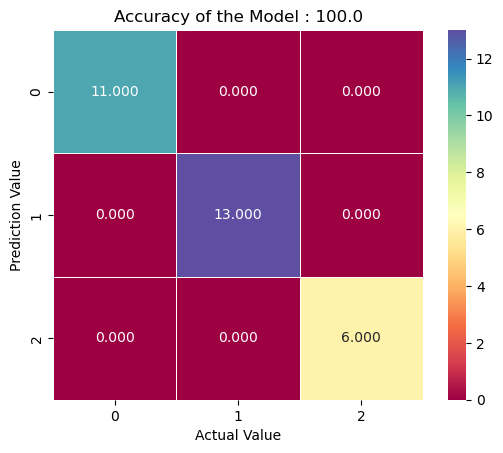

In [44]:
# plt.figure(figsize=12*12)
sns.heatmap(confusion, annot=True, fmt='.3f', linewidths=.5, square=True, cmap="Spectral")
plt.title(f"Accuracy of the Model : {score*100}")
plt.xlabel('Actual Value')
plt.ylabel('Prediction Value')
